#### Jadarian Carter
#### Professor Zhang
#### COMP3800: Data Analytics
#### 06 Novevmber 2025

## Project 2
#### This dataset includes salary information for D.C. government employees. For this project, I’m focusing on Information Technology positions such as Network Development Spec, IT Specialists, Desktop Support Technician, and Inofmration Officer.
#### Goal: Predict the salary of public employees in IT-related roles using job-related features from the DC Public Employee Salary dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("DC_Public_Employee_Salary.csv")
df.head()
print(df.shape)
print(df.columns)

(72202, 9)
Index(['FIRST_NAME', 'LAST_NAME', 'JOBTITLE', 'DESCRSHORT', 'GRADE',
       'COMPRATE', 'HIREDATE_STRING', 'GVT_TYPE_OF_APPT', 'OBJECTID'],
      dtype='object')


### Basic data cleaning
#### I focus exclusively on analyzing employees in IT-related roles. To identify these positions, I filter the dataset using keywords such as "Information Technology", "IT Spec", "Network", "Desktop", "Info Tech", "Information Officer", and "Service Desk".

In [23]:
# Define keywords to filter IT-related job titles
keywords = ['Information Technology', 'IT Spec', 'Network', 'Desktop', 'Info Tech',' Information Officer', 'Service Desk']

# Filter rows where job title contains any of the keywords
df_filtered = df[df['JOBTITLE'].str.contains('|'.join(keywords), case=False, na=False)]

# displays filtered data
print("Filtered dataset shape:", df_filtered.shape)
df_filtered.head(50)

Filtered dataset shape: (1127, 9)


,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID
84,Pradeep,Hariharan,Info Technology Manager (APPSW,DBH,15,127028.79,11/17/2014,MSS - Reg,85
128,Waddah,Kittab,IT Specialist,DCA,14,141707.00,6/15/2015,CS - Reg,129
190,Daniel,Vincent,Information Technology Special,CJCC,13,107984.00,6/24/2019,CS - Reg,191
208,Sean,Gray,IT Specialist (Syst. Admin.),CJCC,13,119916.00,11/6/2023,CS - Reg,209
210,Lori,Faison,Information Technology Manager,CFSA,15,148390.31,12/1/2004,MSS - Reg,211
225,Safdar,Hussain,Information Technology Special,CJCC,14,124091.00,3/10/2014,CS - Reg,226
229,Mohamad,Zib,INFO TECH SPEC,CFSA,13,116943.00,6/5/2023,CS - Reg,230
248,Marina,Havan,Chief Information Officer,CFSA,16,178380.53,7/25/2005,MSS - Reg,249
350,Laressa,Poole,Network Development Manager,DBH,14,132756.90,7/2/1990,MSS - Reg,351
363,Marsha,Parker,Network Development Spec,DBH,12,112310.00,9/29/2014,CS - Reg,364


### Basic data cleaning
#### Dropped irrelevant columns: Remove fields like names and IDs that do not influence salary analysis.
#### Handled missing data: Exclude entries with missing salary values, as they are essential for prediction.
#### Removed duplicates: Eliminate repeated records to ensure data integrity.

In [24]:
# Drop irrelevant columns
columns_to_drop = ['FIRST_NAME', 'LAST_NAME','HIREDATE_STRING', 'OBJECTID', 'DESCRSHORT', 'GVT_TYPE_OF_APPT']
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

# Drop rows with missing salary
df_filtered = df_filtered.dropna(subset=['COMPRATE'])

# Drop duplicates
df_filtered = df_filtered.drop_duplicates()

# Display filtered dataset
df_filtered.isnull().sum()
df_filtered.head(50)

,JOBTITLE,GRADE,COMPRATE
84,Info Technology Manager (APPSW,15,127028.79
128,IT Specialist,14,141707.00
190,Information Technology Special,13,107984.00
208,IT Specialist (Syst. Admin.),13,119916.00
210,Information Technology Manager,15,148390.31
225,Information Technology Special,14,124091.00
229,INFO TECH SPEC,13,116943.00
248,Chief Information Officer,16,178380.53
350,Network Development Manager,14,132756.90
363,Network Development Spec,12,112310.00


#### I used a histogram to see how annual salaries are distributed before cleaning. Then, we remove extreme outliers below 40,000 or above 150,000 to make the data more consistent for modeling. 

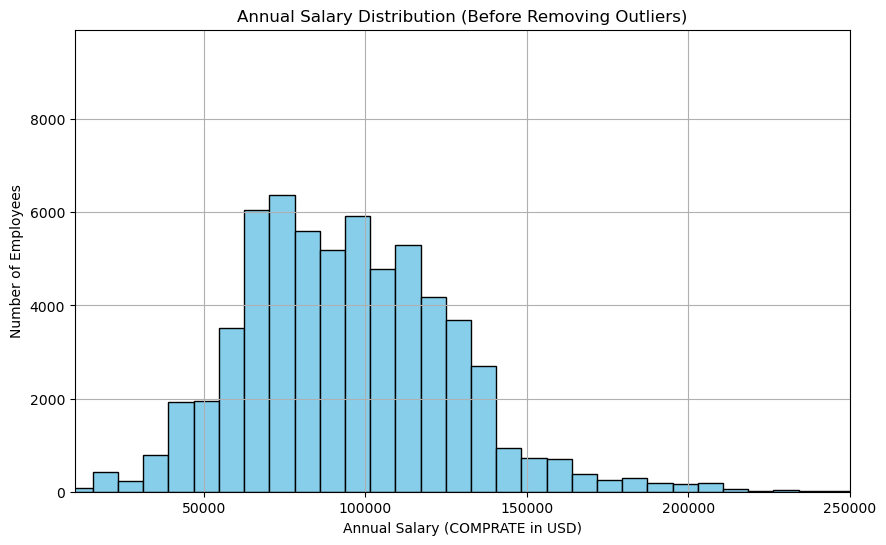

In [25]:
# Shows a histogram of COMPRATE before removing outliers (zoomed in)
plt.figure(figsize=(10, 6))
plt.hist(df['COMPRATE'], bins=50, color='skyblue', edgecolor='black')
plt.title("Annual Salary Distribution (Before Removing Outliers)")
plt.xlabel("Annual Salary (COMPRATE in USD)")
plt.ylabel("Number of Employees")
plt.xlim(10000, 250000)  # Focused range
plt.grid(True)
plt.show()

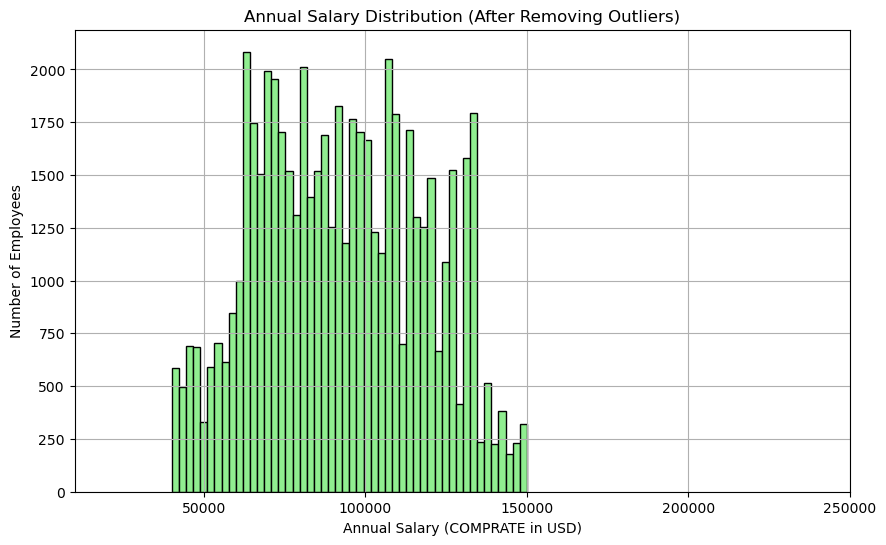

In [26]:
# Remove outliers using simple annual salary thresholds
min_comprate = 40000
max_comprate = 150000

# Keep only rows within the defined range
df = df[(df['COMPRATE'] >= min_comprate) & (df['COMPRATE'] <= max_comprate)]

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# Step 7: Show a histogram of COMPRATE after removing outliers (zoomed in)
plt.figure(figsize=(10, 6))
plt.hist(df['COMPRATE'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Annual Salary Distribution (After Removing Outliers)")
plt.xlabel("Annual Salary (COMPRATE in USD)")
plt.ylabel("Number of Employees")
plt.xlim(10000, 250000)
plt.grid(True)
plt.show()

### Feature Engineering
#### create new variables to help the model capture job characteristics:
#### IS_MANAGER: A binary variable set to 1 if the job title includes terms like "Manager", "Supervisor", or "Officer".
#### IS_TECHNICAL: A binary variable set to 1 if the job title includes terms such as "Engineer", "Analyst", or "Technician".
#### JOB_CATEGORY: Extracted as the first word of the job title (e.g., "Network", "IT") to capture the primary job function.

In [29]:
# Create new columns to help the model understand job roles better
# Manager Flag
df_filtered['IS_MANAGER'] = df_filtered['JOBTITLE'].str.contains('Manager|Supervisor|Officer', case=False).astype(int)

# Technical Role Flag
df_filtered['IS_TECHNICAL'] = df_filtered['JOBTITLE'].str.contains('Specialist|Engineer|Analyst|Technician', case=False).astype(int)

# Job Category: First word of job title
df_filtered['JOB_CATEGORY'] = df_filtered['JOBTITLE'].str.split().str[0]

print(df_filtered)

                             JOBTITLE GRADE   COMPRATE  IS_MANAGER  \
84     Info Technology Manager (APPSW    15  127028.79           1   
128                     IT Specialist    14  141707.00           0   
190    Information Technology Special    13  107984.00           0   
208      IT Specialist (Syst. Admin.)    13  119916.00           0   
210    Information Technology Manager    15  148390.31           1   
...                               ...   ...        ...         ...   
71584         IT Specialist (Network)    14  138184.00           0   
71597                   IT Specialist    11   75775.00           0   
71605       Supervisory IT Specialist    15  156386.34           1   
71933                   IT Specialist    13  110185.00           0   
72165         Service Desk Technician    11   69275.00           0   

       IS_TECHNICAL JOB_CATEGORY  
84                0         Info  
128               1           IT  
190               0  Information  
208               1

#### Remove Low Variance Features

In [30]:
from sklearn.feature_selection import VarianceThreshold

# Select numeric features
numeric_features = df_filtered.select_dtypes(include=[np.number]).drop(columns='COMPRATE')

# Remove features with very little change
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_features)

low_variance = numeric_features.columns[~selector.get_support()]
print("Low variance features:", list(low_variance))

Low variance features: []


#### I used a heatmap to visualize how numeric features relate to each other. Highly correlated variables may introduce redundancy, so we can remove one from each pair to simplify the model.

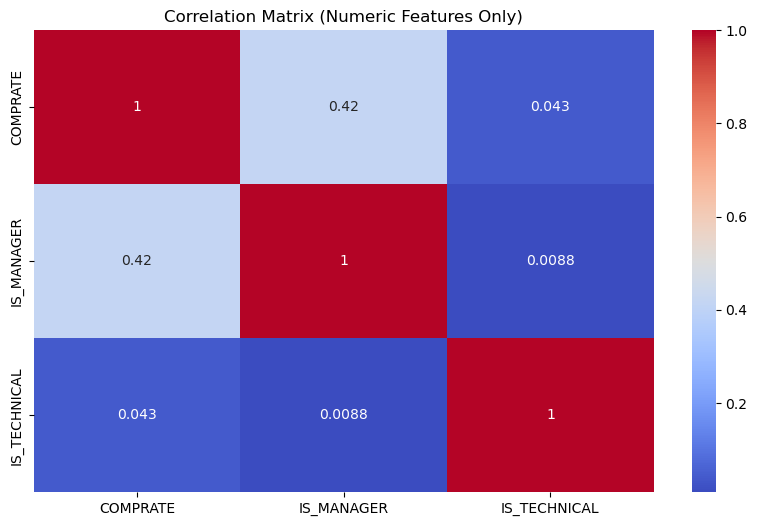

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only use numeric columns
numeric_df = df_filtered.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

#### The ANOVA F-test evaluates how strongly each numeric feature is related to the target variable (`COMPRATE`).  
#### The High F-scores feature has a strong effect on salary.  
#### The Low F-scores or high p-values feature is likely irrelevant. 

In [32]:
from sklearn.feature_selection import f_regression
import pandas as pd

X_num = numeric_features
y = df_filtered['COMPRATE']

f_scores, p_values = f_regression(X_num, y)

anova_df = pd.DataFrame({
    'Feature': X_num.columns,
    'F-Score': f_scores,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)

        Feature     F-Score       p-Value
0    IS_MANAGER  146.189651  1.095030e-30
1  IS_TECHNICAL    1.316959  2.515324e-01


#### I used the Chi-squared test to assess the relationship between categorical features (like JOB_CATEGORY) and salary categories. This helps identify which categorical variables carry meaningful information for predicting salary.

In [34]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert salary to categories for chi-squared test
y_encoded = pd.qcut(df_filtered['COMPRATE'], q=4, labels=False)

# One-hot encode categorical features
X_cat = pd.get_dummies(df_filtered[['JOB_CATEGORY']], drop_first=True)

chi_scores, chi_p = chi2(X_cat, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2': chi_scores,
    'p-Value': chi_p
}).sort_values(by='Chi2', ascending=False)

print(chi_df)

                     Feature       Chi2       p-Value
18  JOB_CATEGORY_Supervisory  50.463427  6.364999e-11
5            JOB_CATEGORY_IT  19.394820  2.265288e-04
0       JOB_CATEGORY_Desktop  17.829545  4.769260e-04
8   JOB_CATEGORY_Information  15.868669  1.206497e-03
20        JOB_CATEGORY_Supvy  14.487727  2.311128e-03
3          JOB_CATEGORY_INFO   8.956494  2.987495e-02
7         JOB_CATEGORY_Info.   8.585635  3.533887e-02
14       JOB_CATEGORY_Senior   7.578386  5.557823e-02
11      JOB_CATEGORY_Network   6.864813  7.633378e-02
2             JOB_CATEGORY_I   5.604528  1.325186e-01
9          JOB_CATEGORY_Lead   5.490679  1.391972e-01
13         JOB_CATEGORY_SUPV   3.789193  2.851457e-01
6          JOB_CATEGORY_Info   3.111765  3.747122e-01
1     JOB_CATEGORY_Director,   3.063953  3.818695e-01
16          JOB_CATEGORY_Sup   3.063953  3.818695e-01
17   JOB_CATEGORY_Supervisor   3.063953  3.818695e-01
19         JOB_CATEGORY_Supv   3.063953  3.818695e-01
21           JOB_CATEGORY_VP

### Build the prediction model
#### StandardScaler normalizes numeric data (important for linear models).
#### OneHotEncoder converts categorical variables into numeric dummy variables.
#### I combined these transformations using a ColumnTransformer to create a clean, fully numeric dataset for modeling.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df_filtered.drop(columns='COMPRATE')
y = df_filtered['COMPRATE']

# Identify column types
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

#### I used an 80/20 split with `train_test_split` to ensures that our model is evaluated on data it hasn’t seen during training, providing a fair measure of performance.

In [36]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#### Linear Regression simple and interpretable baseline model.  
#### Random Forest Regressor ensemble of decision trees that captures complex, non-linear relationships between features and salary.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### R² (R-squared) how much of the salary variance is explained.  
#### MAE (Mean Absolute Error) average prediction error in dollars.  
#### RMSE (Root Mean Squared Error) penalizes large errors more heavily.  

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print("R² Score:", round(r2_score(y_true, y_pred), 4))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Results:
R² Score: 0.776
MAE: 11483.74
RMSE: 14876.29

Random Forest Regressor Results:
R² Score: 0.8096
MAE: 10285.27
RMSE: 13714.89
